# Collage

In [10]:
import cv2
import random
import glob
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def showCollage(img,resize=True,showcv2=True):
    showimg = np.copy(img)
    if resize:
        width = 1600
        showimg = cv2.resize(img,(width,int((width/img.shape[1])*img.shape[0])))
        #showimg = cv2.resize(showimg,(1080,720))
    if showcv2:    
        cv2.imshow("img",showimg)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

In [ ]:
img1 =cv2.resize(cv2.imread("img1.jpeg"),(500,500))
img2 =cv2.resize(cv2.imread("img2.jpeg"),(500,500))

In [ ]:
combine = cv2.vconcat([img1,img2])
combine = cv2.hconcat([
    combine,cv2.resize(img1,(500,1000))])
cv2.imwrite('combined.jpg',combine)

In [ ]:
img1 = cv2.imread("img1.jpeg")
img2 = cv2.imread("img2.jpeg")
print(img1.shape)
print(img2.shape)

In [ ]:
height = 500
img1 = cv2.resize(img1,(int((height/img1.shape[0])*img1.shape[1]),height))
img2 = cv2.resize(img2,(int((height/img2.shape[0])*img2.shape[1]),height))
print(img1.shape)
print(img2.shape)
collage = cv2.hconcat([img1,img2])

In [ ]:
cv2.imshow("collage",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
collage_width = 1920*3
collage_height = 1080*3

In [ ]:
images = glob.glob("data/*JPG")
batch = random.sample(images, random.randint(3,8))
print(batch)

In [6]:
row_height = collage_height // 4
images = glob.glob("data/*JPG")
collage = None
for row in range(5):
    collage_row = None
    batch = random.sample(images, random.randint(3,8))
    print(len(batch))
    print(batch)
    for img in batch:
        img = cv2.imread(img)
        img = cv2.resize(img,(int((row_height/img.shape[0])*img.shape[1]),row_height))
        if collage_row is None:
            collage_row = np.copy(img)
        else:
            collage_row = cv2.hconcat([collage_row,img])
    if collage is None:
        collage = np.copy(collage_row)
    else:
        width = collage.shape[1]
        collage_row = cv2.resize(collage_row,(width,int((width/collage_row.shape[1])*collage_row.shape[0])))
        collage = cv2.vconcat([collage,collage_row])
    
cv2.imwrite("collage.jpg",collage)
showCollage(collage,resize=True)


8
['data\\4.jpg', 'data\\6.jpg', 'data\\7.jpg', 'data\\1.jpg', 'data\\2.jpg', 'data\\5.jpg', 'data\\3.jpg', 'data\\8.jpg']
7
['data\\2.jpg', 'data\\1.jpg', 'data\\4.jpg', 'data\\3.jpg', 'data\\7.jpg', 'data\\5.jpg', 'data\\8.jpg']
5
['data\\6.jpg', 'data\\1.jpg', 'data\\4.jpg', 'data\\5.jpg', 'data\\2.jpg']
4
['data\\1.jpg', 'data\\5.jpg', 'data\\4.jpg', 'data\\8.jpg']
6
['data\\6.jpg', 'data\\7.jpg', 'data\\2.jpg', 'data\\4.jpg', 'data\\3.jpg', 'data\\5.jpg']


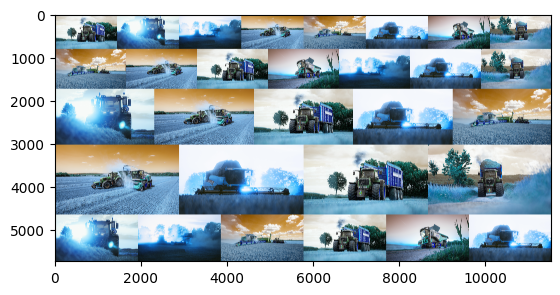

In [11]:
plt.imshow(collage)

# Implementation of Mosaic

In [17]:
#create a base grid
nrows = ncols = 8
basegrid = np.zeros([nrows,ncols])

In [13]:
def drawGrid(arr):
    for rows in arr:
        print(rows)

In [14]:
drawGrid(basegrid)

[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
combine_cells = random.randint(1,nrows-3)
print(combine_cells)
startx = random.randint(0,nrows)
starty = random.randint(0,ncols)

In [24]:
class mos:
    def __init__(self,startx,starty,size,mosaic_id = None):
        #print("im a mosaic")
        self.startx = startx
        self.starty = starty
        self.size = size
        self.mosaic_id = None
    def __str__(self):
        #print("string")
        print("starting at x={},y={}".format(str(self.startx),str(self.starty)))
        print("ending at x={},y={}".format(str(self.startx+self.size-1),str(self.starty+self.size-1)))
        print("size is {}by{}".format(str(self.size),str(self.size)))
        return ""
    def checkSpaceOnGrid(self,grid):
        space_taken = False
        for x in range(self.size):
            x = self.startx + x
            for y in range(self.size):
                y = self.starty + y
                if grid[x][y] != 0:
                    #print("space is taken")
                    space_taken = True
                    break
                #else:
                    #print("space is still free...")
            if space_taken:
                break
        return not space_taken
    def placeOnGrid(self,grid,id):
        for x in range(self.size):
            x = self.startx + x
            for y in range(self.size):
                y = self.starty + y
                grid[x][y] = id
                self.mosaic_id = id
        return grid

In [26]:
id = 1
mosaic = []
basegrid = np.zeros([nrows,ncols])
while(id < 17):
    combine_cells = random.randint(1,3)
    #print(combine_cells)
    startx = random.randint(0,nrows-3)
    starty = random.randint(0,ncols-3)
    m = mos(startx=startx,starty=starty,size=combine_cells)
    #print(m)
    #m.startPoint
    #print(m.startx)
    if m.checkSpaceOnGrid(basegrid):
    #m.checkSpaceOnGrid(basegrid)
        basegrid = m.placeOnGrid(basegrid,id)
        id += 1
        mosaic.append(m)
drawGrid(basegrid)
for ms in mosaic:
    print(ms.mosaic_id)

[8. 8. 5. 6. 0. 0. 0. 0.]
[ 8.  8. 14.  9.  1.  1.  1.  0.]
[10.  2.  2.  2.  1.  1.  1.  0.]
[15.  2.  2.  2.  1.  1.  1.  0.]
[16.  2.  2.  2.  4. 13.  0.  0.]
[11.  7.  7.  7. 12.  3.  3.  3.]
[0. 7. 7. 7. 0. 3. 3. 3.]
[0. 7. 7. 7. 0. 3. 3. 3.]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
